In [1]:
import cv2
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def show_img(img, size=(16,10)):
    plt.figure(figsize=size)
    plt.imshow(opencv2matplotlib(img))
    plt.axis('off')
    plt.show()
    
MODEL_FILE = 'model.h5'
SHAPE = (600, 800, 3)

In [3]:
h5 = h5py.File('pp_plates_all.h5', 'r')
files = h5['filenames'][:].astype('str')
data_x = h5['x'][:]
h5.close()

In [6]:
files

array(['data/placas/180902/P9180040.jpg',
       'data/placas/180902/P9180005.jpg',
       'data/placas/180902/P9180038.jpg',
       'data/placas/180902/P9190066.jpg',
       'data/placas/180902/P9180011.jpg',
       'data/placas/180902/P9180001.jpg',
       'data/placas/180902/P9190063.jpg',
       'data/placas/180902/P9180053.jpg',
       'data/placas/180902/P9190059.jpg',
       'data/placas/180902/P9180037.jpg',
       'data/placas/180902/P9190064.jpg',
       'data/placas/180902/P9190058.jpg',
       'data/placas/180902/P9180030.jpg',
       'data/placas/180902/P9180025.jpg',
       'data/placas/180902/P9180047.jpg',
       'data/placas/180902/P9180027.jpg',
       'data/placas/180902/P9180014.jpg',
       'data/placas/180902/P9180010.jpg',
       'data/placas/180902/P9180033.jpg',
       'data/placas/180902/P9180051.jpg',
       'data/placas/180902/P9180048.jpg',
       'data/placas/180902/P9180006.jpg',
       'data/placas/180902/P9190057.jpg',
       'data/placas/180902/P919006

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def show_img(img, size=(16,10)):
    plt.figure(figsize=size)
    plt.imshow(opencv2matplotlib(img))
    plt.axis('off')
    plt.show()

In [2]:
img = cv2.imread('../data/placas/141002/Pa140002.jpg')

In [3]:
cv2.imwrite('asd.jpg', img)

True

In [3]:
from keras.models import load_model, Sequential
from keras.applications.vgg16 import VGG16, preprocess_input

MODEL_FILE = 'model.h5'
SHAPE = (600, 800, 3)

m1 = VGG16(include_top=False, input_shape=SHAPE)
m1.layers.pop()
m2 = load_model(MODEL_FILE)

final_model = Sequential()
final_model.add(m1)
final_model.add(m2)

In [9]:
from imutils import opencv2matplotlib

(1, 600, 800, 3)


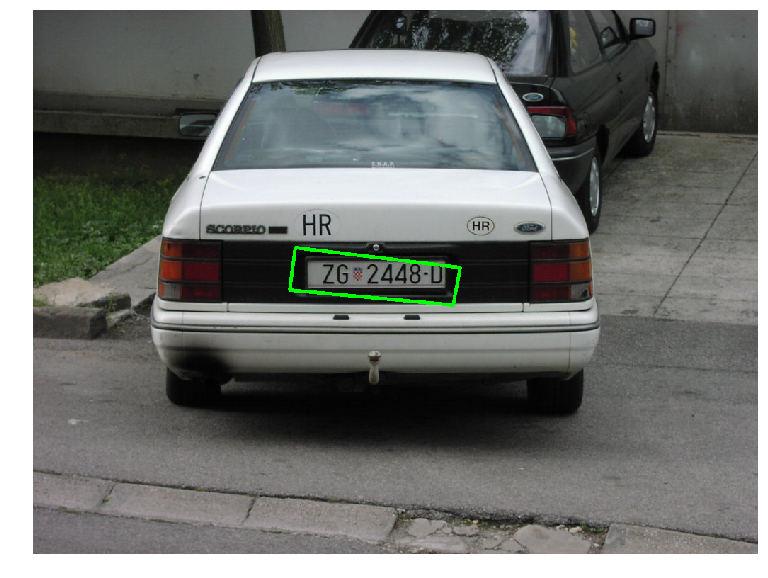

CPU times: user 14.5 s, sys: 488 ms, total: 15 s
Wall time: 4.5 s


In [10]:
%%time
file = '../data/placas/170902/P9170010.jpg'
img = cv2.imread(file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, SHAPE[:2][::-1])
img = np.expand_dims(img, 0)
img = preprocess_input(img.astype(np.float32))
print(img.shape)
boxes = final_model.predict(img)[0]

img = cv2.imread(file)
h, w = img.shape[:2]
boxes[:,0] *= w
boxes[:,1] *= h

cv2.polylines(img, [boxes.astype(np.int32)], 1, (0,255,0), 4)

show_img(img)